In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from sklearn.metrics import jaccard_score
import warnings
warnings.filterwarnings('ignore')

compare_df = pd.read_csv('compare_df.csv')

In [26]:
def process_mask(mask):
    mask_temp = mask.copy()
    mask_temp[mask == 255] = 0
    return mask_temp


def score(pred_thresh, mask):
    return round(jaccard_score(mask.flatten(), pred_thresh.flatten()), 3)

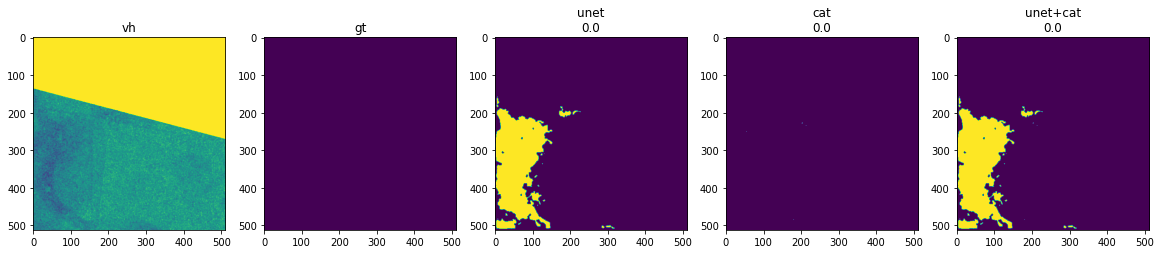

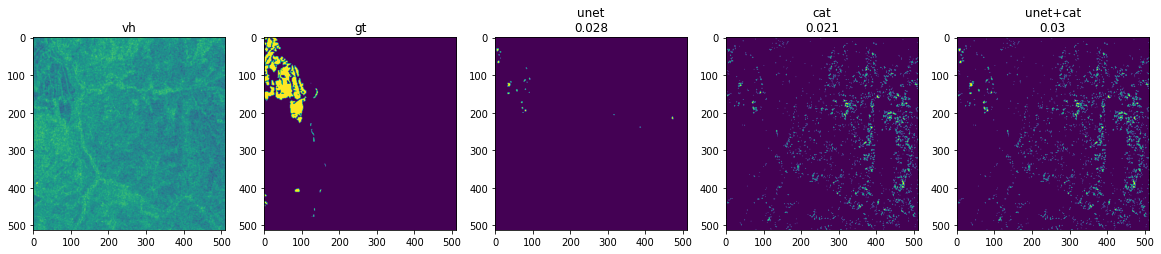

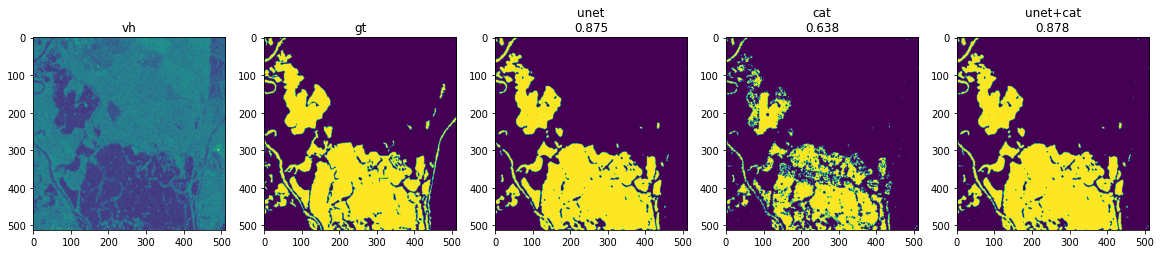

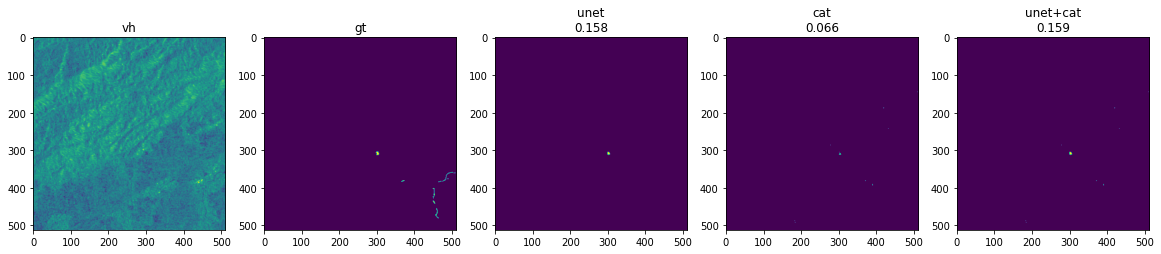

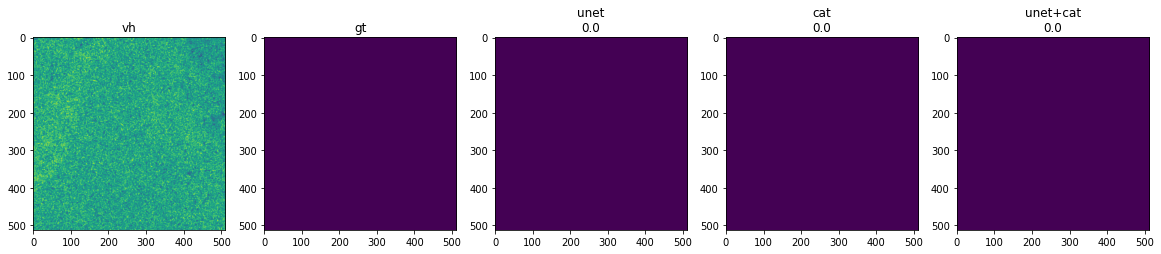

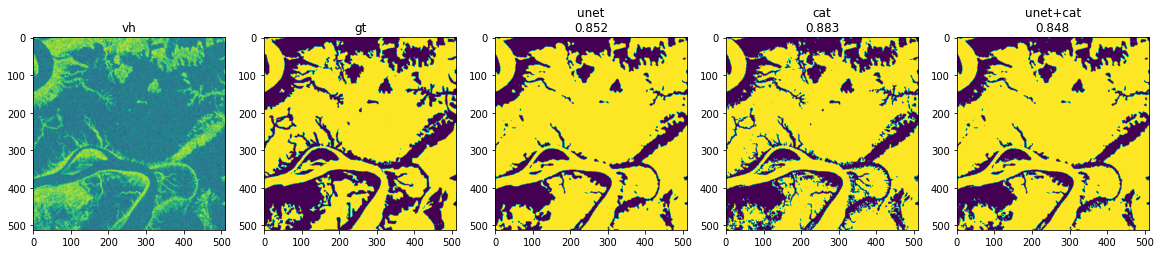

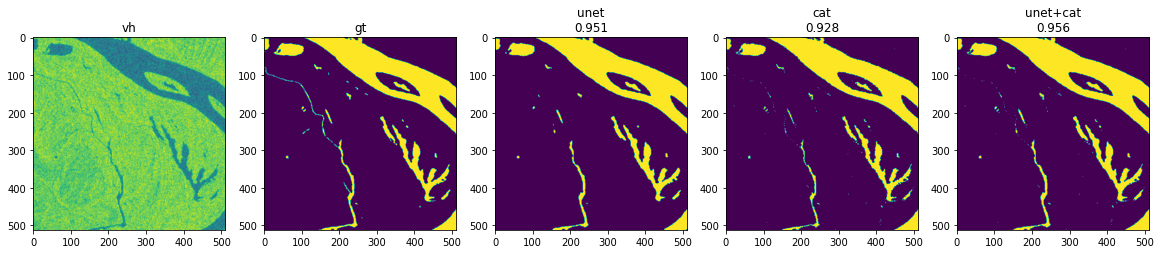

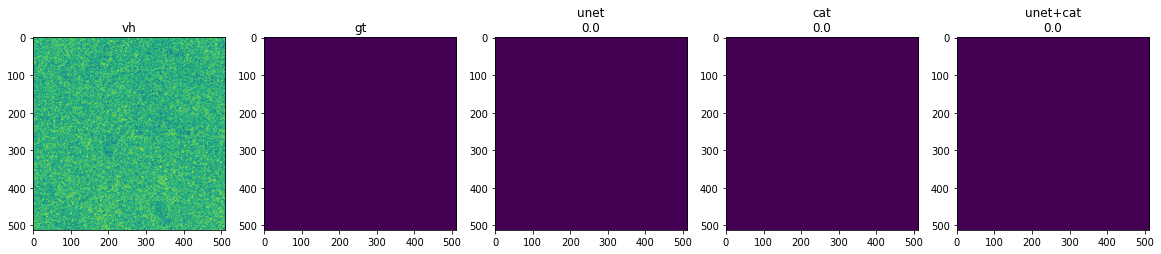

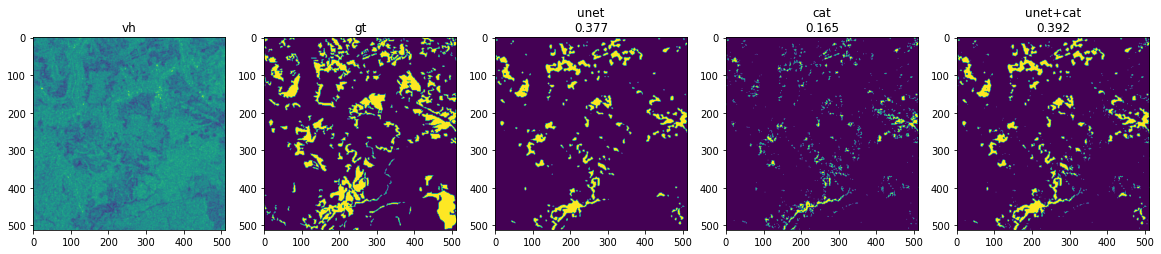

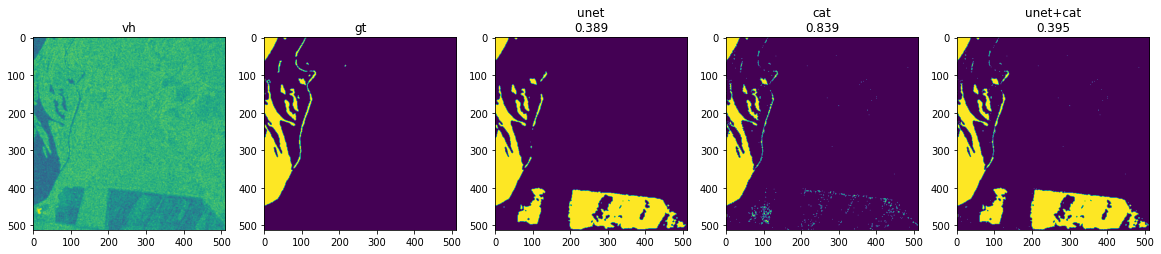

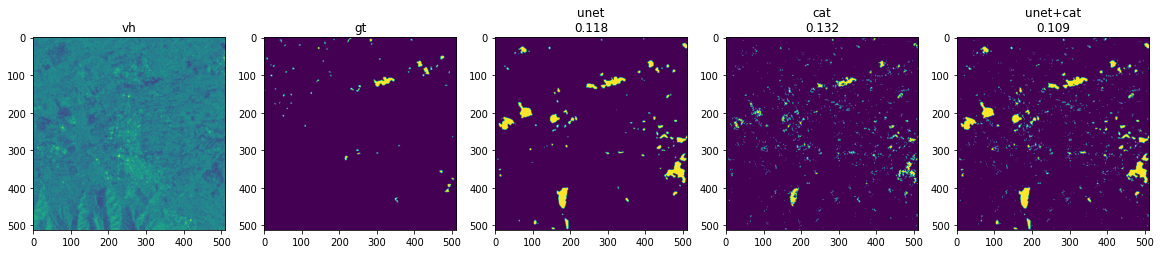

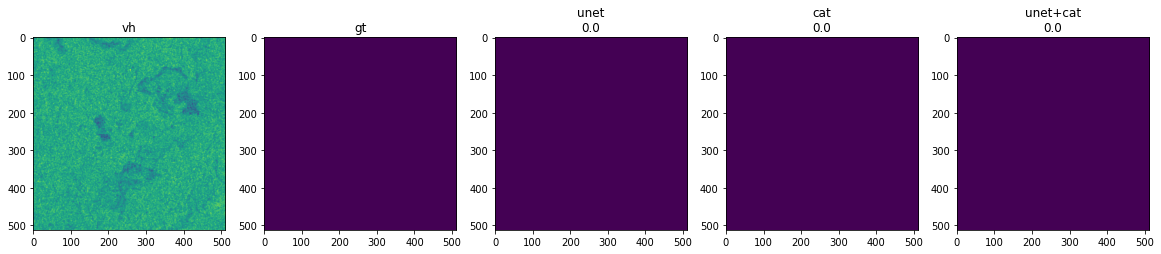

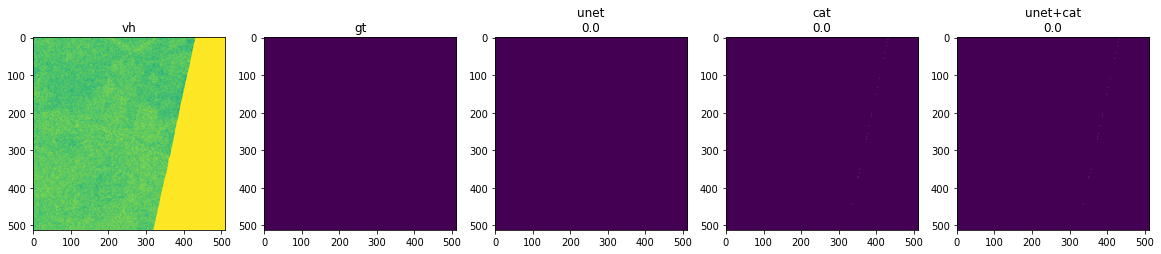

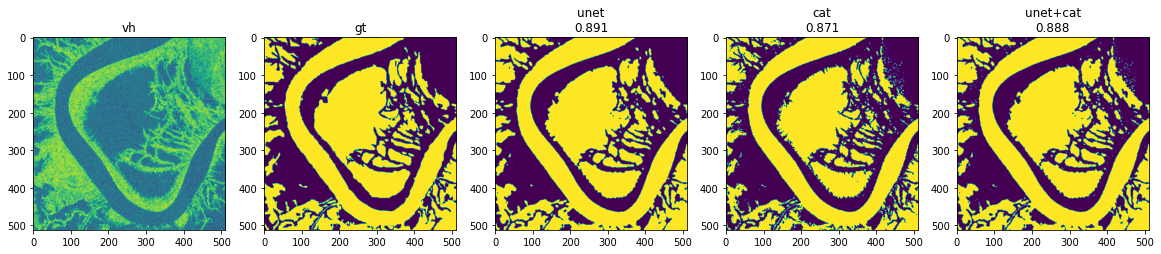

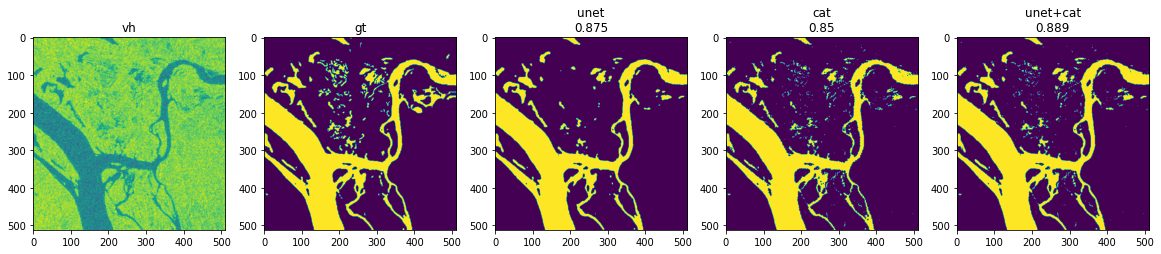

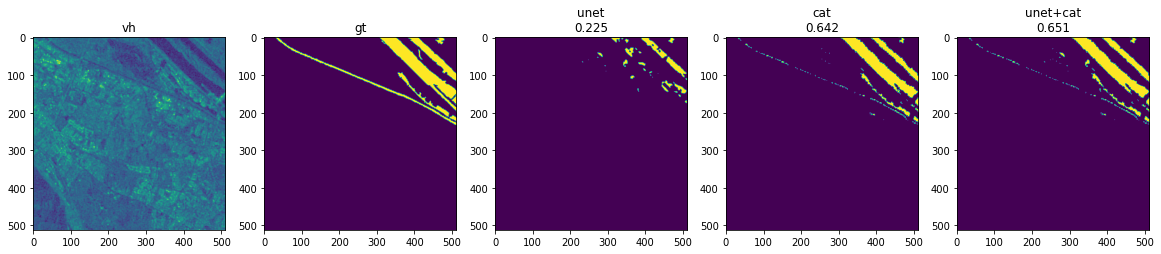

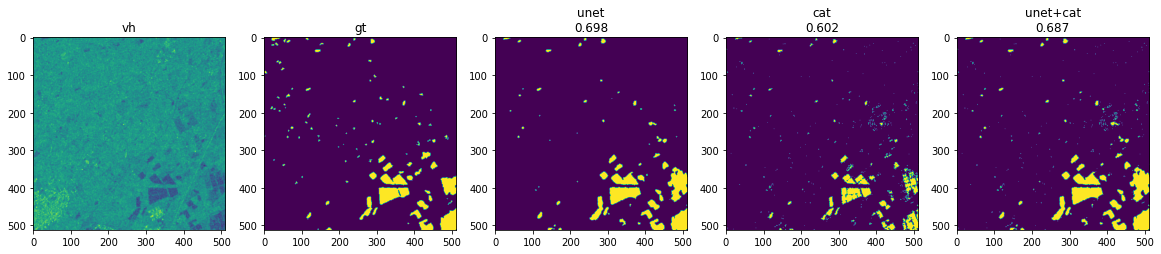

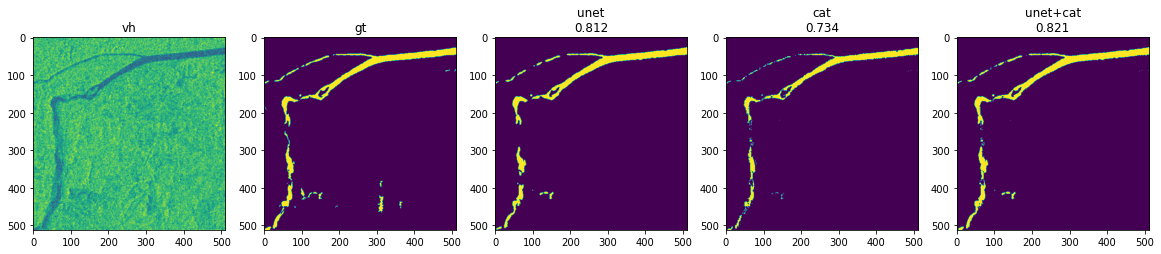

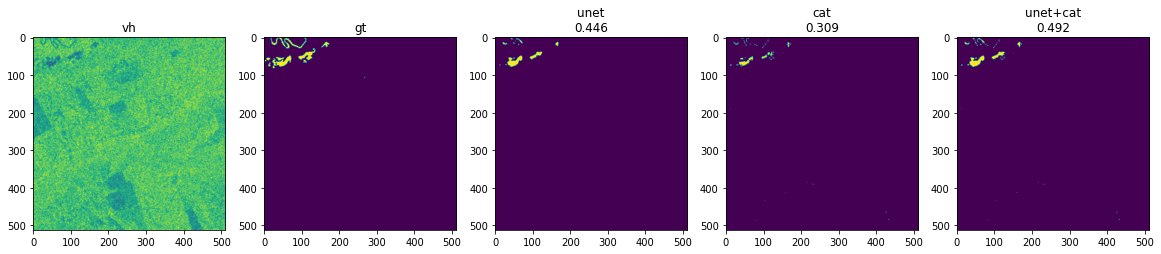

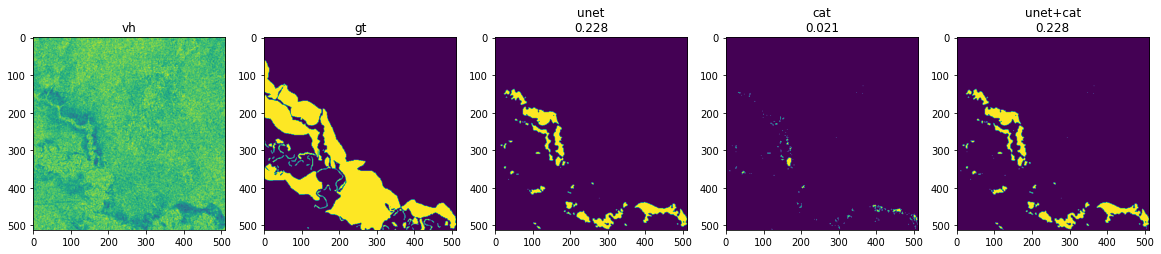

In [27]:
for i, val in compare_df.iterrows():
    
    unet_pred = np.load(val[1]+'.npy')
    cat_pred = np.load(val[2]+'.npy')
    
    with rasterio.open('train_labels/{}.tif'.format(val[0])) as fmask:
        gt = process_mask(fmask.read(1))
        
    with rasterio.open('train_features/{}_vh.tif'.format(val[0])) as fvh:
        vh = fvh.read(1)
    
    _, ax = plt.subplots(1, 5, figsize=(20, 5))
    
    ax[0].imshow(vh)
    ax[0].set_title('vh')
    
    ax[1].imshow(gt)
    ax[1].set_title('gt')
    
    ax[2].imshow(np.round(unet_pred))
    ax[2].set_title('unet\n'+str(score(np.round(unet_pred), gt)))
    
    ax[3].imshow(np.round(cat_pred))
    ax[3].set_title('cat\n'+str(score(np.round(cat_pred), gt)))
    
    all_pred = np.round(np.max([unet_pred, cat_pred], axis=0))
    
    ax[4].imshow(all_pred)
    ax[4].set_title('unet+cat\n'+str(score(all_pred, gt)))
    
    plt.show()